This notebooks looks into various Python-based machine learning and data science libraries in an attempt to build a 
machine learning model capable of predicting median house values for the California a dataset.

This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

# Data

1. Longitude: A measure of how far west a house is; a higher value is farther west
2. Latitude: A measure of how far north a house is; a higher value is farther north
3. HouseAge: Median age of a house within a block; a lower number is a newer building
4. AveRooms: A measure of average number of rooms 
5. MedInc: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
6. AveBedRms: A measure of average number of bed rooms 
7. Polulation: A measure of people residing within a block
8. AveOccupation: Average number of household members
9. Target : Median house value for households within a block (measured in US Dollars)


* A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).
* An household is a group of people residing within a home. 


Since the average number of rooms and bedrooms in this dataset are provided per household, these columns may take surpinsingly large values for block groups with few households and many empty houses, such as vacation resorts.

# Importing Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import plot_roc_curve

# Load Data

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
housing_data = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
# add target column to dataset
housing_data["Target"] = housing["target"]
housing_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
housing_data.shape

(20640, 9)

# Exploratory Data Analysis (EDA)

In [6]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
housing_data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

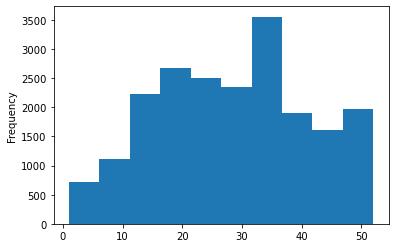

In [8]:
housing_data.HouseAge.plot.hist();

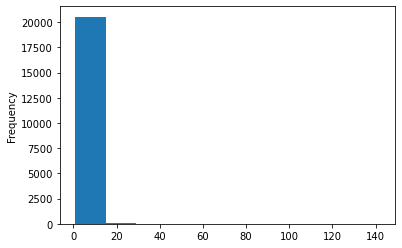

In [9]:
housing_data.AveRooms.plot.hist();

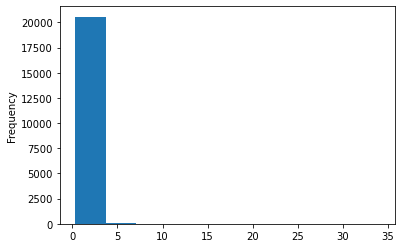

In [10]:
housing_data.AveBedrms.plot.hist();

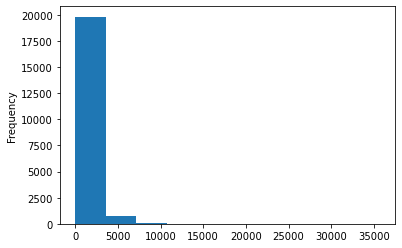

In [11]:
housing_data.Population.plot.hist();

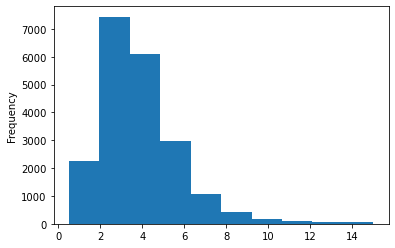

In [12]:
housing_data.MedInc.plot.hist();

## Co-Relation between Independent and Dependent Variables

In [13]:
housing_data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


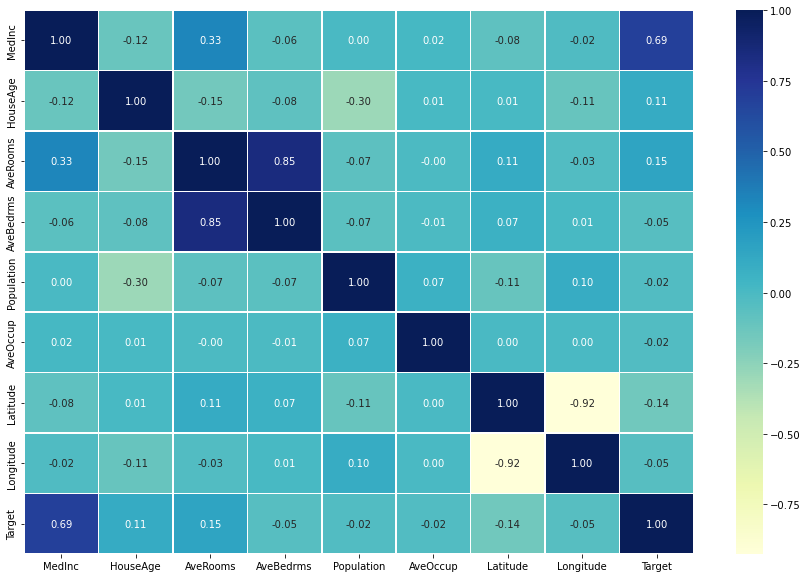

In [14]:
corr_matrix = housing_data.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

# Modelling

In [15]:
np.random.seed(42)
X = housing_data.drop("Target", axis=1)
y = housing_data["Target"]

In [16]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [17]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Target, Length: 20640, dtype: float64

In [18]:
# Split data into train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [19]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [20]:
y_train

14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
         ...  
11284    2.292
11964    0.978
5390     2.221
860      2.835
15795    3.250
Name: Target, Length: 16512, dtype: float64

Trying 3 different machine learnign regression models:

    1. Linear Regression
    2. Ridge Regression
    3. Random Forest Regressor

In [21]:
# Put models in a dictionary
models = {"Linear Regression": LinearRegression(),
         "Ridge Regression": Ridge(),
         "Random Forest": RandomForestRegressor(),
         "Decision Tree Regression": DecisionTreeRegressor()
         }

# Create a function to fit nd score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    '''Fits and evaluate machine laerning models
    models: a dictionary of differnt machine learning classification models
    X_train: Training data (no labels)
    X_test: Testing data (no labels)
    y_train: train labels
    y_test: test lables'''
    np.random.seed(42)
    # Make a dictionary to keep model score
    model_score = {}
    # Loop through models
    for name,model in models.items():
        # Fit the model to data
        model.fit(X_train,y_train)
        # Evaluate model and append its score
        model_score[name] = model.score(X_test,y_test)
    return model_score

In [22]:
model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)
model_scores

{'Linear Regression': 0.5757877060324512,
 'Ridge Regression': 0.5758549611440125,
 'Random Forest': 0.8051230593157366,
 'Decision Tree Regression': 0.6126625171471667}

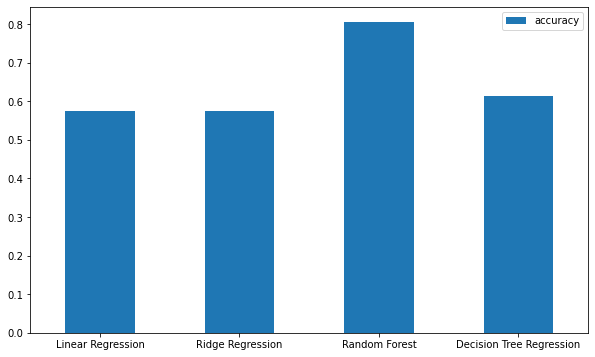

In [23]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(figsize=(10,6));
plt.xticks(rotation=0);

# Improving Model Performance

### Hyperparameter tuning using RandomizedSearchCV

In [24]:
# LinearRegression() cannot be tuned

# Create a hyperparameter grid for Ridge()
ridge_reg_grid = {"alpha":[0, 1, 0.01],
                  "solver":['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}

# Createhyperparameter grid for RandomForestClassifier()
ran_for_grid = {"n_estimators": np.arange(10,1000,50),
               "max_depth":[None,3,5,10],
               "min_samples_split":np.arange(2,20,2),
               "min_samples_leaf":np.arange(1,20,2)}

# Createhyperparameter grid for DecisionTreeClassifier()
dec_tree_grid = {"max_depth":[None,3,5,10],
                "min_samples_split":np.arange(2,20,2),
                "min_samples_leaf":np.arange(1,20,2)}

In [42]:
# tune RidgeRegression
np.random.seed(42)
# Setup random Hyperparameter search for Ridge Regression
rs_ridge_reg = RandomizedSearchCV(Ridge(),
                                param_distributions= ridge_reg_grid,
                                cv =5,
                                scoring='neg_mean_absolute_error',
                                n_iter=20,
                                verbose=True)
# Fit random hyperparameter search model for Ridge Regression
rs_ridge_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=20,
                   param_distributions={'alpha': [0, 1, 0.01],
                                        'solver': ['auto', 'svd', 'cholesky',
                                                   'lsqr', 'sparse_cg', 'sag',
                                                   'saga']},
                   scoring='neg_mean_absolute_error', verbose=True)

In [43]:
rs_ridge_reg.best_params_

{'solver': 'svd', 'alpha': 0}

In [44]:
rs_ridge_reg.score(X_test,y_test)

-0.5332001304956565

In [47]:
# Tuning Random forest classifier
np.random.seed(42)
# Setup random Hyperparameter search for Random Forest Regressor
rs_rf = RandomizedSearchCV(RandomForestRegressor(),
                                param_distributions= ran_for_grid,
                                cv =5,
                                n_iter=20,
                                verbose=True)
# Fit random hyperparameter search model for Random Forest Regressor
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [48]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [49]:
rs_rf.score(X_test,y_test)

0.8037123354897688

In [53]:
%time
# Tuning Decision Tree classifier
np.random.seed(42)
# Setup random Hyperparameter search for Decision Tree
rs_dt = RandomizedSearchCV(DecisionTreeRegressor(),
                           param_distributions= dec_tree_grid,
                           cv =5,
                           n_iter=20,
                           verbose=True)
# Fit random hyperparameter search model for DecisionTree
rs_dt.fit(X_train,y_train)

Wall time: 0 ns
Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])},
                   verbose=True)

In [54]:
rs_dt.best_params_

{'min_samples_split': 4, 'min_samples_leaf': 19, 'max_depth': None}

In [55]:
rs_dt.score(X_test,y_test)

0.7253859597391294

### Hyperparameter tuning using GridSearchCV

In [25]:
%time
# Different Hyperparameters for RandomForestRegressor() Model
ran_for_grid = {"n_estimators": [450,500,550],
               "max_depth":[None],
               "min_samples_split":[12,14,16],
               "min_samples_leaf":[1,2,3]}
# Setup grid hyperparameter search for LogisticRegression
gs_ran_for = GridSearchCV(RandomForestRegressor(),
                                param_grid= ran_for_grid,
                                cv =5,
                                verbose=True)
# Fit th Grid Search hyperparameter search model
gs_ran_for.fit(X_train,y_train)

Wall time: 0 ns
Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [12, 14, 16],
                         'n_estimators': [450, 500, 550]},
             verbose=True)

In [26]:
gs_ran_for.best_params_

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 12,
 'n_estimators': 450}

In [27]:
# Evaluate the gridsearch Logistic  Regression model
gs_ran_for.score(X_test,y_test)

0.8033823212772858

## Evaluating the tuned Machine Learning Classifier
* ROC Curve
* AUC
* Classification Report
* Precision
* Recall
* F1 Score
* Confusion Matrix

To evaluate and make comparisons on trained model, we need to make predictions

In [28]:
# Make predictions with tuned model
y_preds = gs_ran_for.predict(X_test)
y_preds

array([0.50205185, 0.74780296, 4.75808877, ..., 4.86760234, 0.71153064,
       1.66363714])

##### Mean Absolute Error

In [35]:
print("Mean Absolute Error: ", mean_absolute_error(y_test,y_preds))

Mean Absolute Error:  0.3285453198599655


##### Mean Squared Error

In [36]:
print("Mean Absolute Error: ", mean_squared_error(y_test,y_preds))

Mean Absolute Error:  0.2576495714791294


##### R2 Error

In [37]:
print(f"R2: {r2_score(y_test,y_preds)*100:.2f}%")

R2: 80.34%


# Save and Load the model

In [38]:
import pickle
# Save an existing model to file
pickle.dump(gs_ran_for, open("random_forest_reg_gridsearch_tuned.pkl","wb"))